In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('archive/Pokemon.csv')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
data.shape

(800, 13)

In [6]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [13]:
[(c, data[c].isnull().mean()) for c in data.columns]

[('#', 0.0),
 ('Name', 0.0),
 ('Type 1', 0.0),
 ('Type 2', 0.4825),
 ('Total', 0.0),
 ('HP', 0.0),
 ('Attack', 0.0),
 ('Defense', 0.0),
 ('Sp. Atk', 0.0),
 ('Sp. Def', 0.0),
 ('Speed', 0.0),
 ('Generation', 0.0),
 ('Legendary', 0.0)]

Слишком большой процент строк имеет пропуск, удалять строки опасно. Можно удалить колонку или засетить значение дефолтным(Normal)

In [22]:
data_clean = res = data.dropna(axis=1, how='any')
data_clean.shape

(800, 12)

In [29]:
data_normal = data.fillna(value='Normal')
data_normal.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [33]:
data_clean.dtypes

#              int64
Name          object
Type 1        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Перейдем к стадии кодирования категориальных признаков. Попробуем кодировать тип покемонов.

In [53]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding

In [54]:
le = LabelEncoder()
encoded_types = le.fit_transform(data_clean['Type 1'])

In [55]:
data_clean['Type 1'].unique()


array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [56]:
np.unique(encoded_types)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [57]:
le.inverse_transform([0, 1, 2, 3])


array(['Bug', 'Dark', 'Dragon', 'Electric'], dtype=object)

One-hot encoding

In [58]:
pd.get_dummies(data_clean['Type 1']).head()


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [59]:
data_clean.groupby("Type 1").mean().sort_values("Total")

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Poison,251.785714,399.142857,67.250000,74.678571,68.821429,60.428571,64.392857,63.571429,2.535714,0.000000
Normal,319.173469,401.683673,77.275510,73.469388,59.846939,55.816327,63.724490,71.551020,3.051020,0.020408
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Grass,344.871429,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143,0.042857
Water,303.089286,430.455357,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143,0.035714
Ice,423.541667,433.458333,72.000000,72.750000,71.416667,77.541667,76.291667,63.458333,3.541667,0.083333
Ground,356.281250,437.500000,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,3.156250,0.125000


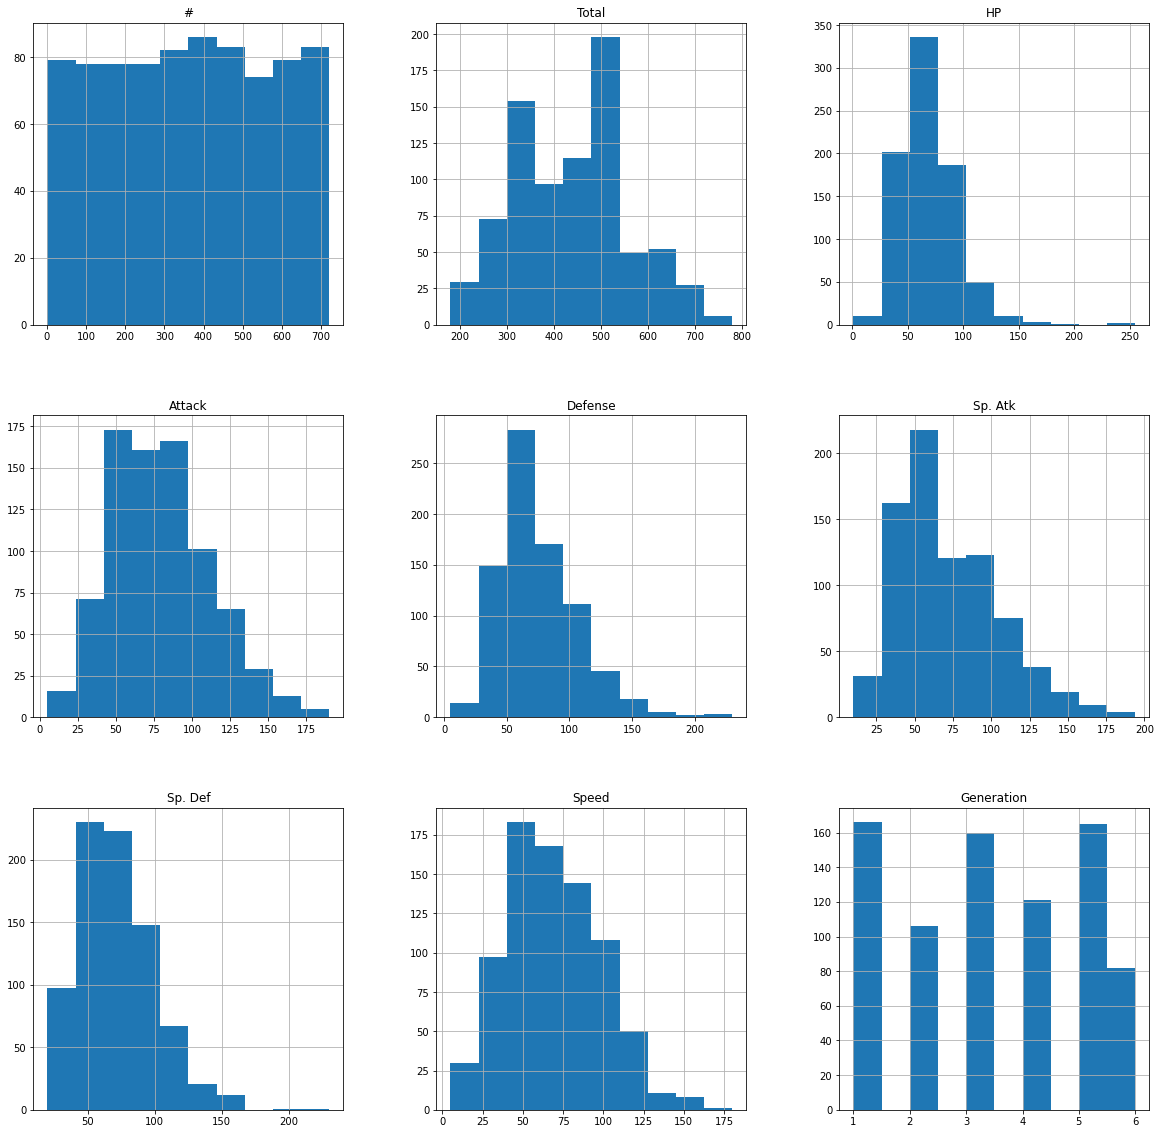

In [61]:
data_clean.hist(figsize=(20,20))
plt.show()

In [69]:
import scipy.stats as stats

def diagnostic_plots(df, col):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[col].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.show()
    
def diagnostic(dat):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    dat.hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(dat, dist="norm", plot=plt)
    plt.show()    

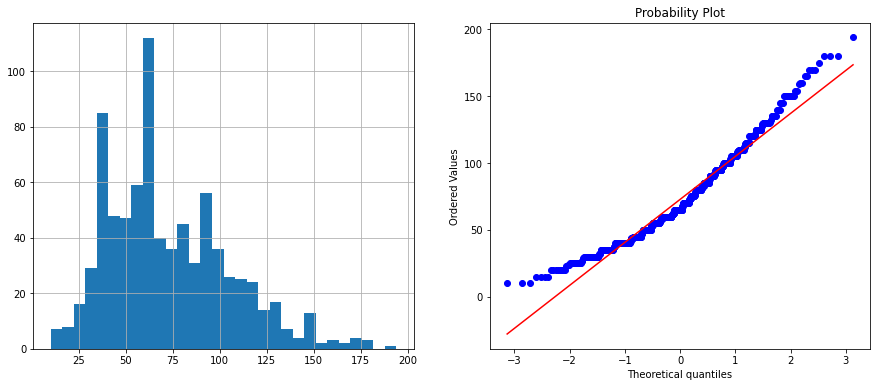

In [70]:
diagnostic_plots(data_clean, 'Sp. Atk')


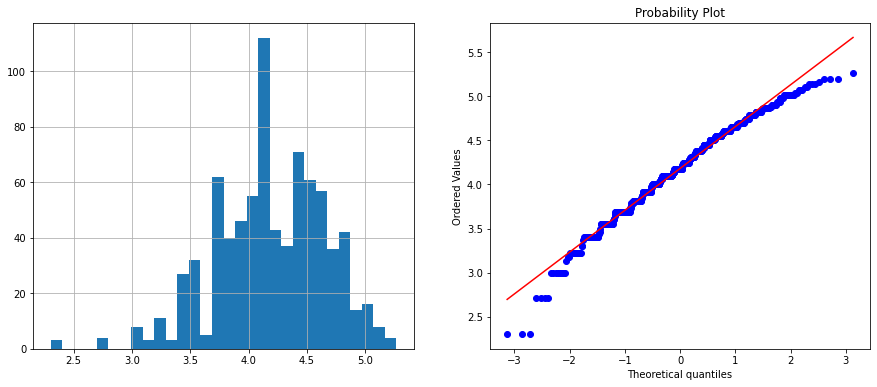

In [73]:
diagnostic(np.log(data_clean['Sp. Atk']))

0.33253199847700005


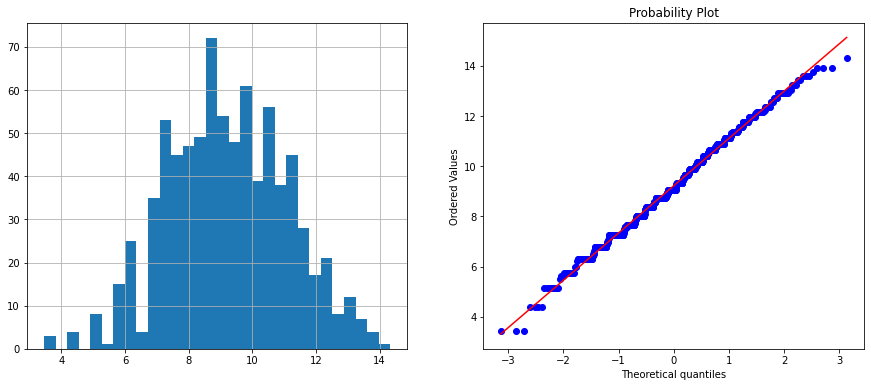

In [75]:
data_clean['Box'], param = stats.boxcox(data_clean['Sp. Atk']) 
print(param)
diagnostic_plots(data_clean, 'Box')


Преобраззование Бокса-Кокса показывает и правда лучший результат, как и в лекции. РАспределение и правда почти нормальным